In [6]:
# Import the required libraries: Pandas, Numpy, Matplotlib and   Seaborn

import pandas as pd          
import numpy as np 
import datetime
import seaborn as sns # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime
from pandas import Series # To work on series
%matplotlib inline
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")


In [7]:

# Load and read the data from the Dataset

df=pd.read_csv("catalog.csv",encoding = "ISO-8859-1")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 23 columns):
id                      1693 non-null int64
date                    1690 non-null object
time                    629 non-null object
continent_code          164 non-null object
country_name            1693 non-null object
country_code            1693 non-null object
state/province          1692 non-null object
population              1693 non-null int64
city/town               1689 non-null object
distance                1692 non-null float64
location_description    551 non-null object
latitude                1692 non-null float64
longitude               1692 non-null float64
geolocation             1692 non-null object
hazard_type             1693 non-null object
landslide_type          1692 non-null object
landslide_size          1692 non-null object
trigger                 1691 non-null object
storm_name              132 non-null object
injuries                515 non-null floa

In [9]:
# Check the data type of our date column

# Print the first few rows of the date column

a=(df['date'].head())
a

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object

In [11]:
# check the data type of our date column

c=df['date'].dtype
c


dtype('O')

In [37]:
# Finding  the data column rows that are throwing errors

print(pd.to_datetime(df['date'], errors='coerce', format="%m/%d/%Y"))
mask = pd.to_datetime(df['date'], errors='coerce', format="%m/%d/%Y").isnull()
print (df['date'][mask])


0      2007-03-02
1      2007-03-22
2      2007-04-06
3      2007-04-14
4      2007-04-15
5      2007-04-20
6      2007-04-24
7      2007-05-21
8      2007-06-27
9      2007-06-27
10     2007-06-27
11     2007-07-01
12     2007-07-04
13     2007-07-08
14     2007-07-13
15     2007-07-24
16     2007-08-09
17     2007-08-11
18     2007-08-14
19     2007-08-17
20     2007-08-18
21     2007-08-18
22     2007-08-18
23     2007-08-19
24     2007-08-19
25     2007-08-20
26     2007-08-21
27     2007-08-21
28     2007-08-23
29     2007-09-01
          ...    
1663   2015-09-17
1664   2015-09-10
1665   2015-08-31
1666   2015-08-31
1667   2015-09-22
1668   2015-05-09
1669   2015-05-23
1670   2015-10-21
1671   2015-10-21
1672   2015-09-12
1673   2015-10-15
1674   2016-02-24
1675   2016-02-24
1676   2016-02-15
1677   2016-02-24
1678   2016-02-21
1679   2016-02-24
1680   2016-01-28
1681   2016-02-24
1682   2016-02-27
1683   2016-02-27
1684   2016-02-14
1685   2016-02-26
1686   2016-02-27
1687   201

In [34]:
# Convert our date columns to data time 1

d=df['date'] = pd.to_datetime(df['date'])
d.sample(2)

785   2011-07-15
627   2011-04-09
Name: date, dtype: datetime64[ns]

Convert our date columns to datetime

In [13]:
# Convert our date columns to datetime
# Now that we know that our date column isn't being recognized as a date, it's time to convert it so that it is recognized as a date. This is called "parsing dates" because we're taking in a string and identifying its component parts.

# Create a new column, date_parsed, with the parsed dates

g=df['date_parsed'] = pd.to_datetime(df['date'], format = "%m/%d/%y")
g.sample(3)



791    2011-07-18
1605   2015-09-07
549    2010-11-30
Name: date, dtype: datetime64[ns]

In [15]:
# Check the first few rows of the new date column
# The dates have been re_arranged to fit their default  order datetime objects(year, month, day)

z=df['date_parsed'].head()
z
# We  have succesfully parsed our date column

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

In [16]:
# check the data type of our our parsed date column

df['date_parsed'].dtype

dtype('<M8[ns]')

What if I run into an error with multiple date formats? While we're specifying the date format here, sometimes you'll run into an error when there are multiple date formats in a single column. If that happens, you have have pandas try to infer what the right date format should be. You can do that like so:

In [17]:

# Infer the date  format in pandas

df['date_parsed'] = pd.to_datetime(df['date'], infer_datetime_format=True)



Why don't you always use infer_datetime_format = True? There are two big reasons not to always have pandas guess the time format. The first is that pandas won't always been able to figure out the correct date format, especially if someone has gotten creative with data entry. The second is that it's much slower than specifying the exact format of the dates.


In [23]:
# Select just the day of the month from our column

# get the day of the month from the date_parsed column

day_of_month_df= df['date_parsed'].dt.day
day_of_month_df.sample(3)


426    28.0
274    14.0
281    18.0
Name: date_parsed, dtype: float64

In [28]:
# Plot the day of the month to check the date parsing

# remove na's
day_of_month_df123 = day_of_month_df.dropna()
day_of_month_df123.sample(3)

161    28.0
726    19.0
567    22.0
Name: date_parsed, dtype: float64

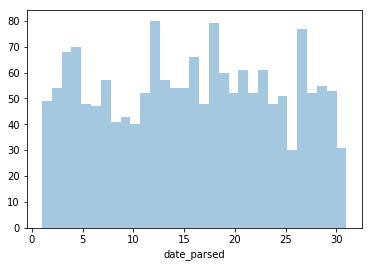

In [29]:
# Plot the day of the month using the day of the month after removing the Missing Nans Values in the parsed date time column

sns.distplot(day_of_month_df123, kde=False, bins=31)


Congratulations, we have parsed our dates correctly and the graph makes good sense

